In [1]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np 

In [3]:
data = pd.read_excel('DS1_C5_S1_Income_Data_Challenge.xlsx')
data

,Age,WorkClass,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,40,United-States,<=50K
1,50,Self-emp,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,Male,20,United-States,<=50K


### TAsk - 1

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   WorkClass       32561 non-null  object
 2   Education       32561 non-null  object
 3   Education_Num   32561 non-null  int64 
 4   Marital_Status  32561 non-null  object
 5   Occupation      32561 non-null  object
 6   Relationship    32561 non-null  object
 7   Gender          32561 non-null  object
 8   Hours_Per_Week  32561 non-null  int64 
 9   Native_Country  32561 non-null  object
 10  Income_Bracket  32561 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.7+ MB


In [10]:
data.shape

(32561, 11)

In [11]:
data.columns

Index(['Age', 'WorkClass', 'Education', 'Education_Num', 'Marital_Status',
       'Occupation', 'Relationship', 'Gender', 'Hours_Per_Week',
       'Native_Country', 'Income_Bracket'],
      dtype='object')

In [8]:
data.isnull().sum()

Age               0
WorkClass         0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Gender            0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

### TAsk -2

In [19]:
def seprate_data_types(data):
    categorical = []
    continuous = []
    for column in data.columns:
        if data[column].dtype == 'object':
            categorical.append(column)
        
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(data)

print('categorical')
print(categorical)
print(' ')
print('continuous')
print(continuous)

categorical
['WorkClass', 'Education', 'Marital_Status', 'Occupation', 'Relationship', 'Gender', 'Native_Country', 'Income_Bracket']
 
continuous
['Age', 'Education_Num', 'Hours_Per_Week']


In [20]:
from tabulate import tabulate
table = [categorical, continuous]

print(tabulate({"Categorical":categorical,
                "continuous": continuous}, 
               headers = ["categorical", "continuous"]))

categorical     continuous
--------------  --------------
WorkClass       Age
Education       Education_Num
Marital_Status  Hours_Per_Week
Occupation
Relationship
Gender
Native_Country
Income_Bracket


### Task - 2

In [24]:
def info_of_cate(column):
    print(f"Unique values in {column} are : {data[column].unique()}")
    print(f"Mode of {column} is : {data[column].mode()[0]}")
    print(f"Number of missing values in {column} is {data[column].isnull().sum()}")

In [25]:
info_of_cate('WorkClass')

Unique values in WorkClass are : [' State-gov' 'Self-emp' ' Private' ' Federal-gov' ' Local-gov' ' ?'
 ' Self-emp' ' Without-pay' ' Never-worked']
Mode of WorkClass is :  Private
Number of missing values in WorkClass is 0


In [26]:
info_of_cate('Education')

Unique values in Education are : [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Mode of Education is :  HS-grad
Number of missing values in Education is 0


In [27]:
info_of_cate('Marital_Status')

Unique values in Marital_Status are : [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
Mode of Marital_Status is :  Married-civ-spouse
Number of missing values in Marital_Status is 0


In [28]:
info_of_cate('Occupation')

Unique values in Occupation are : [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
Mode of Occupation is :  Prof-specialty
Number of missing values in Occupation is 0


In [29]:
info_of_cate('Relationship')

Unique values in Relationship are : [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
Mode of Relationship is :  Husband
Number of missing values in Relationship is 0


In [30]:
info_of_cate('Gender')

Unique values in Gender are : [' Male' ' Female']
Mode of Gender is :  Male
Number of missing values in Gender is 0


In [31]:
info_of_cate('Native_Country')

Unique values in Native_Country are : [' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']
Mode of Native_Country is :  United-States
Number of missing values in Native_Country is 0


In [32]:
info_of_cate('Income_Bracket')

Unique values in Income_Bracket are : [' <=50K' ' >50K']
Mode of Income_Bracket is :  <=50K
Number of missing values in Income_Bracket is 0


### Task - 4

In [33]:
WorkClass = data.WorkClass.value_counts()
WorkClass

WorkClass
 Private         22696
Self-emp          2541
 Local-gov        2093
 ?                1836
 State-gov        1298
 Self-emp         1116
 Federal-gov       960
 Without-pay        14
 Never-worked        7
Name: count, dtype: int64

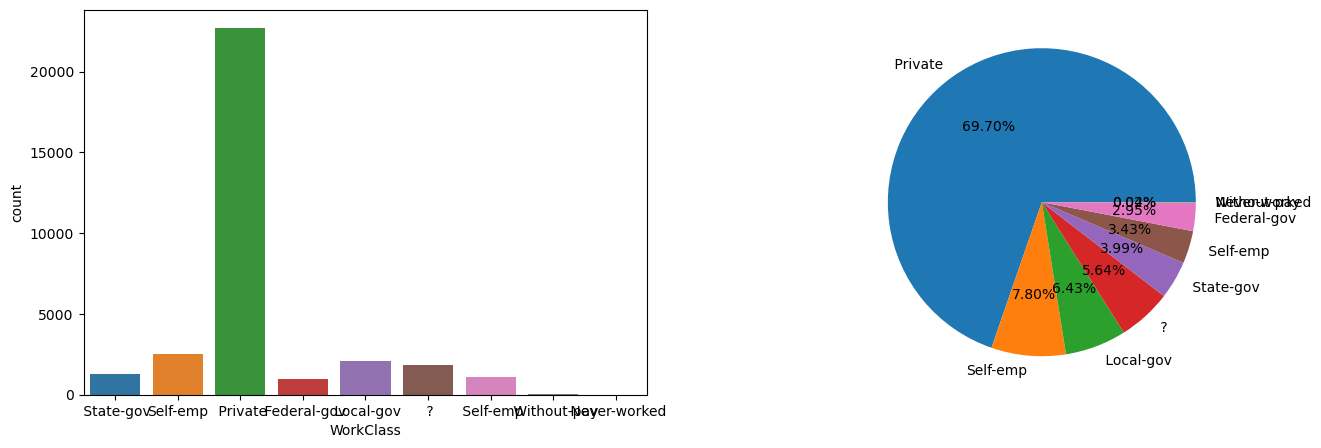

In [36]:
fig, ax = plt.subplots(1,2, figsize=(16,5))

percent = WorkClass
labels = list(data.WorkClass.value_counts().index)

sns.countplot(x = data.WorkClass, ax = ax[0])
plt.pie(percent, labels = labels, autopct="%.2f%%")
plt.show()

In [37]:
Education = data.Education.value_counts()
Education

Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

In [38]:
def bar_percentage(ax, count: "number of rows in data "):
    for bar in ax.patches:                                            # ax.patches returns the rectange object from matplotlib
        percentage = f"{round((bar.get_height() / count) *100, 2)}%"  # first it calculate the bar height and then dividing by the number of row(to calculate percentage)
                                                                            # in data and multiply with 100 to get the percentage and rounding of by 2 numbers.
        x = bar.get_x() + bar.get_width() /2                          # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
        y = bar.get_height()                                          # get_height: returns height of rectangle bar.
        ax.annotate(percentage, (x, y), va = "bottom", ha = "center") # va: Vertical axis: -> top means percentage would bneath the bar head. top, bottom or center 
                                                                      # ha: Horizontal axis:-> how you want to keep it. can be changed to center, left, right.
                                                                      # annotate: used to annotate over objects. here objects are the bars 
    plt.show()

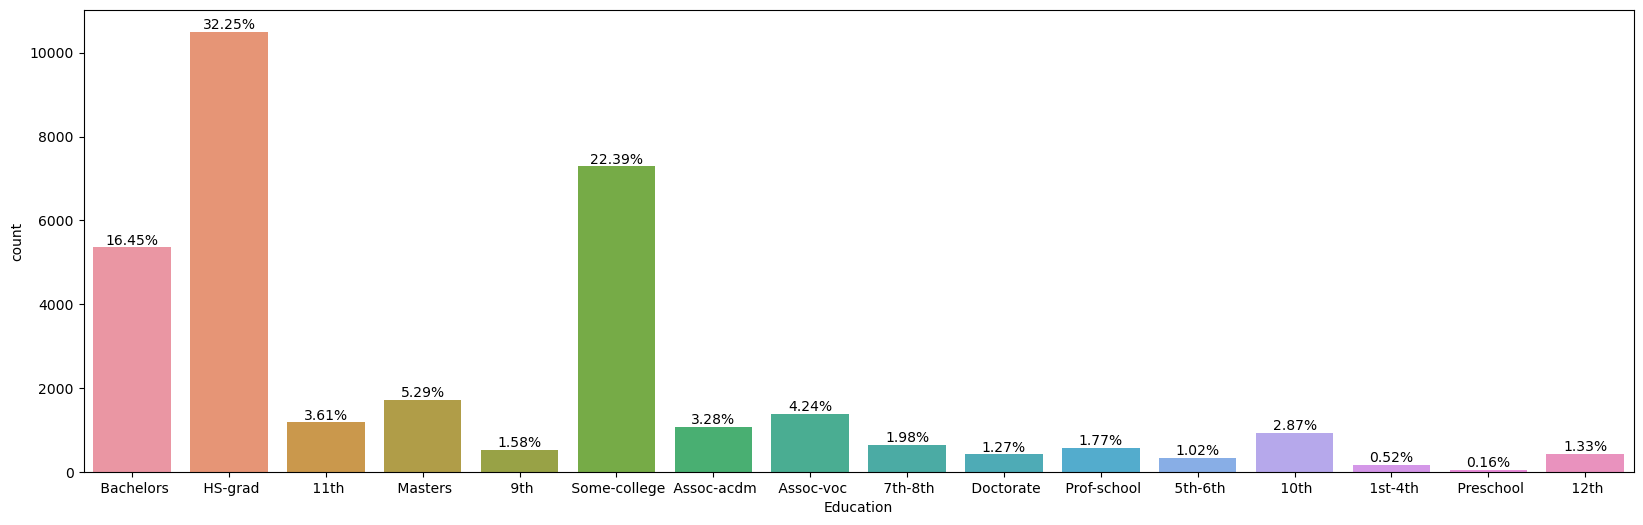

In [42]:
fig, ax = plt.subplots(figsize  = (20,6))
ax = sns.countplot(x = data["Education"])
bar_percentage(ax, len(data))                            # calling the function to plot the percentage on the bars

In [43]:
Marital_Status = data.Marital_Status.value_counts()
Marital_Status

Marital_Status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64

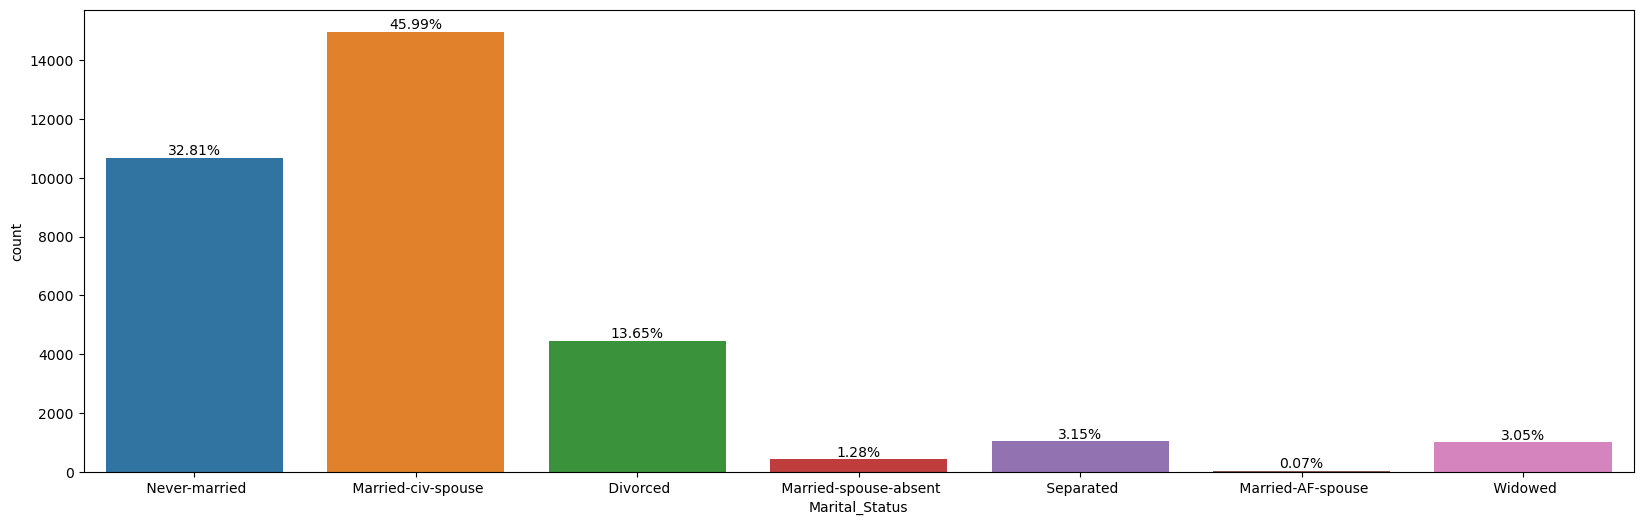

In [51]:
fig, ax = plt.subplots(figsize  = (20,6))
ax = sns.countplot(x = data["Marital_Status"])
bar_percentage(ax, len(data))


In [52]:
Occupation = data.Occupation.value_counts()
Occupation

Occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

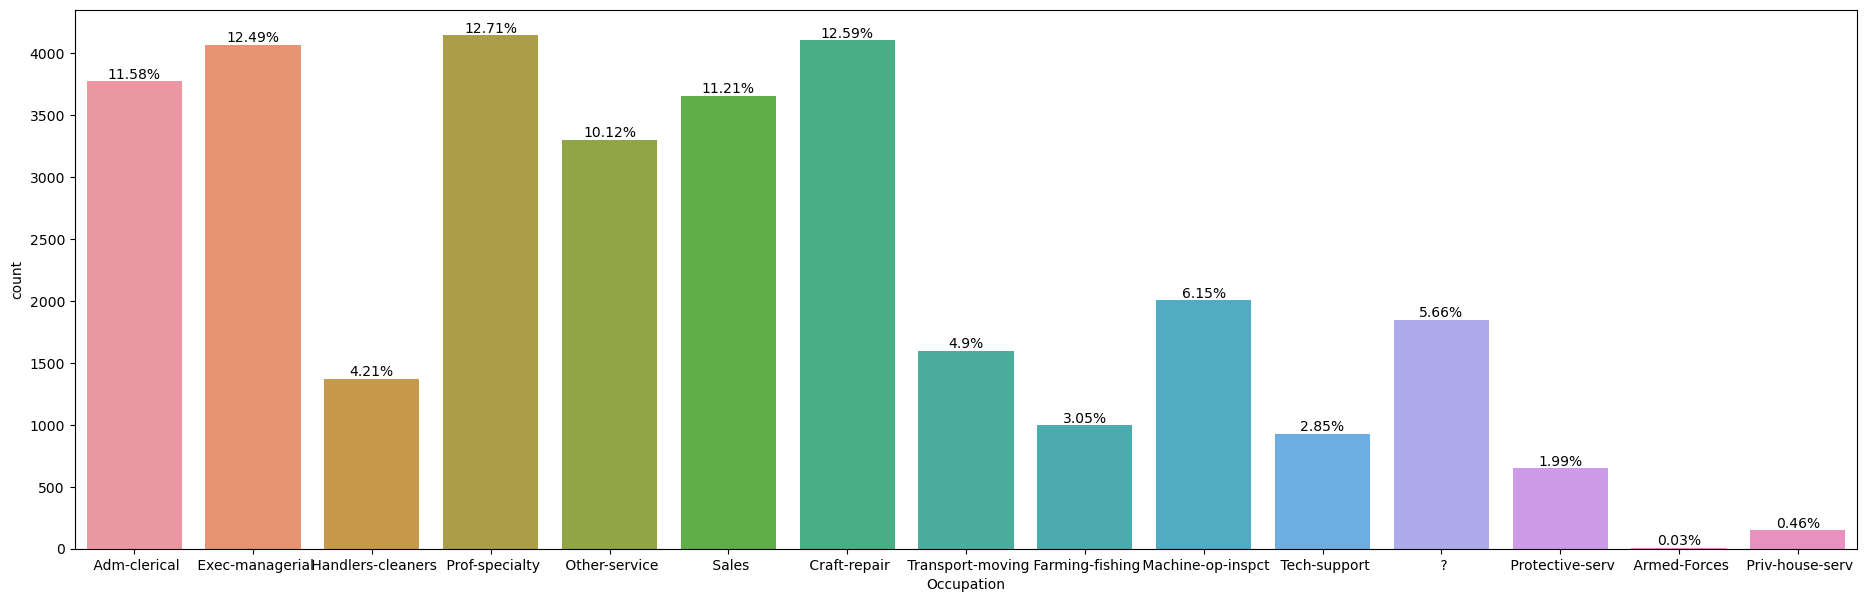

In [57]:
fig, ax = plt.subplots(figsize  = (23,7))
ax = sns.countplot(x = data["Occupation"])
bar_percentage(ax, len(data))


In [58]:
Relationship = data.Relationship.value_counts()
Relationship

Relationship
 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: count, dtype: int64

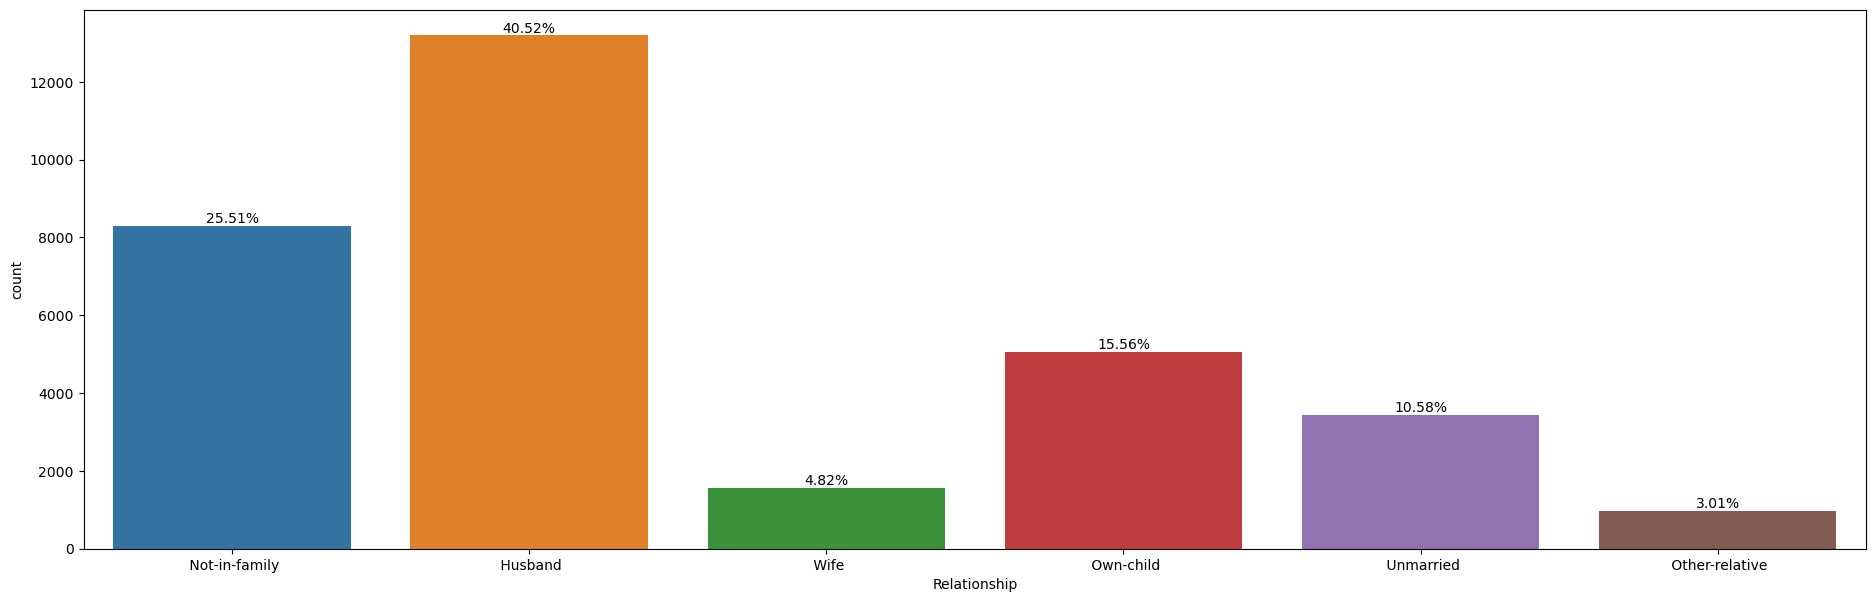

In [59]:
fig, ax = plt.subplots(figsize  = (23,7))
ax = sns.countplot(x = data["Relationship"])
bar_percentage(ax, len(data))

In [60]:
Gender = data.Gender.value_counts()
Gender

Gender
 Male      21790
 Female    10771
Name: count, dtype: int64

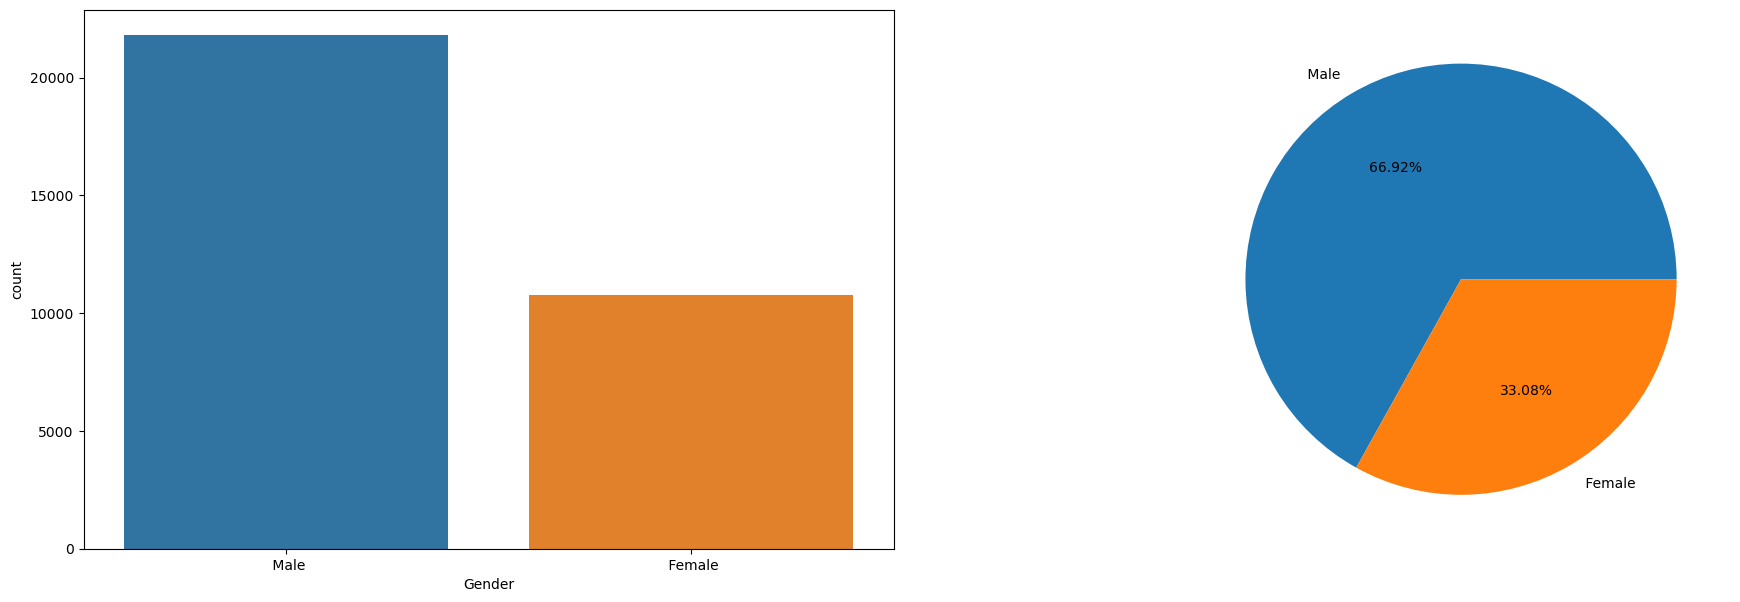

In [66]:
fig, ax = plt.subplots(1,2,figsize= (23,7))
sns.countplot(x = data["Gender"], ax=ax[0])

labels = list(data.Gender.value_counts().index)

plt.pie(x=Gender, labels=labels, autopct="%.2f%%")
plt.show()

In [67]:
Native_Country = data.Native_Country.value_counts()
Native_Country

Native_Country
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

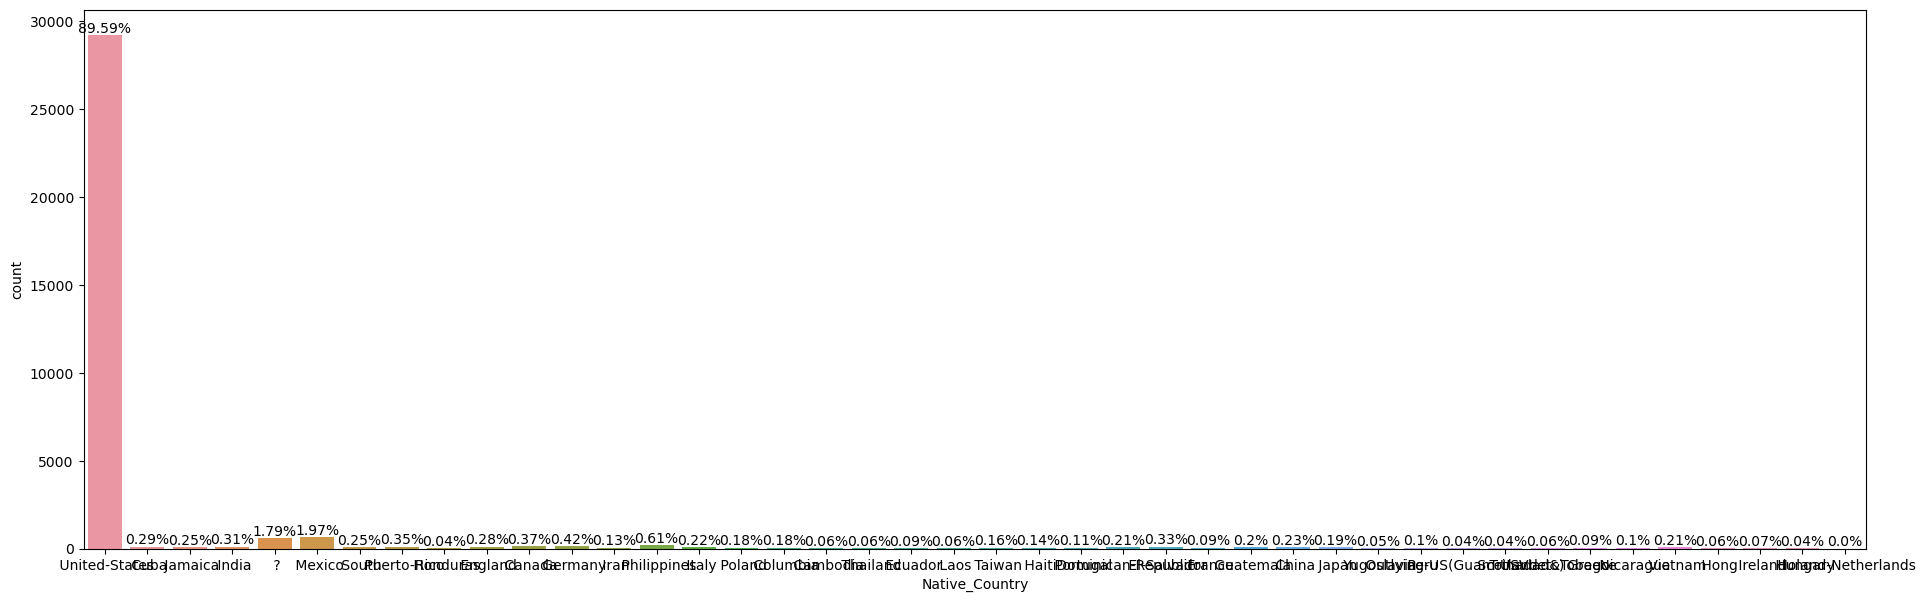

In [68]:
fig, ax = plt.subplots(figsize  = (23,7))
ax = sns.countplot(x = data["Native_Country"])
bar_percentage(ax, len(data))

In [69]:
Income_Bracket = data.Income_Bracket.value_counts()
Income_Bracket

Income_Bracket
 <=50K    24720
 >50K      7841
Name: count, dtype: int64

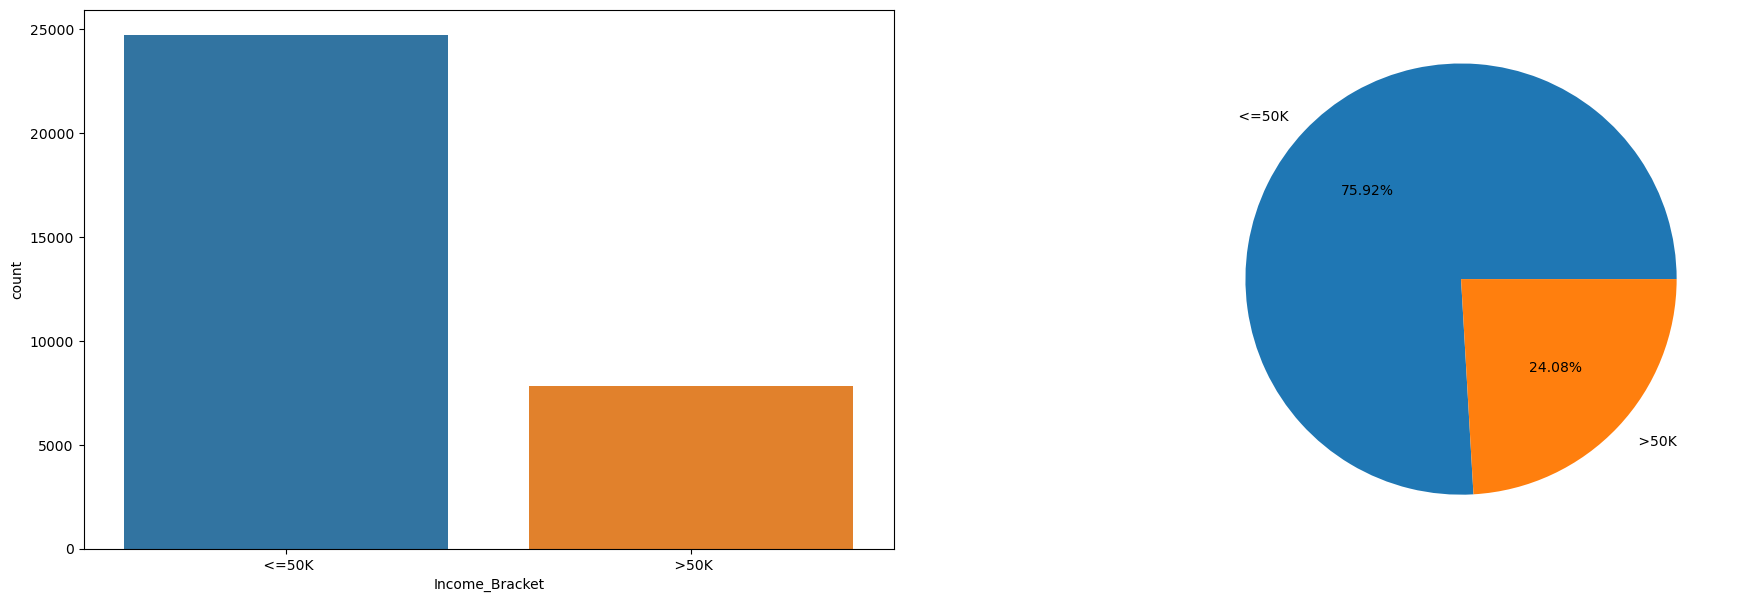

In [70]:
fig, ax = plt.subplots(1,2,figsize= (23,7))
sns.countplot(x = data["Income_Bracket"], ax=ax[0])

labels = list(data.Income_Bracket.value_counts().index)

plt.pie(x=Income_Bracket, labels=labels, autopct="%.2f%%")
plt.show()

### Task -5

In [71]:
# LEVEL 1 Analysis of Numerical Columns
# User defined function for calculating mean, median, mode, standard deviation, and count of all null values

def info_of_numerical(col):
    print(f"The mean of the {col} is {data[col].mean()}")
    print(f"The median of the {col} is {data[col].median()}")
    print(f"The mode of the {col} is {data[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {data[col].std()}")
    print(f"Number of missing values in the {col} is {data[col].isnull().sum()}")

In [72]:
info_of_numerical("Age")

The mean of the Age is 38.58164675532078
The median of the Age is 37.0
The mode of the Age is 36
The standard deviation of the Age is 13.640432553581146
Number of missing values in the Age is 0


In [73]:
info_of_numerical("Education_Num")

The mean of the Education_Num is 10.0806793403151
The median of the Education_Num is 10.0
The mode of the Education_Num is 9
The standard deviation of the Education_Num is 2.5727203320673406
Number of missing values in the Education_Num is 0


In [74]:
info_of_numerical("Hours_Per_Week")

The mean of the Hours_Per_Week is 40.437455852092995
The median of the Hours_Per_Week is 40.0
The mode of the Hours_Per_Week is 40
The standard deviation of the Hours_Per_Week is 12.34742868173081
Number of missing values in the Hours_Per_Week is 0


### Task - 6

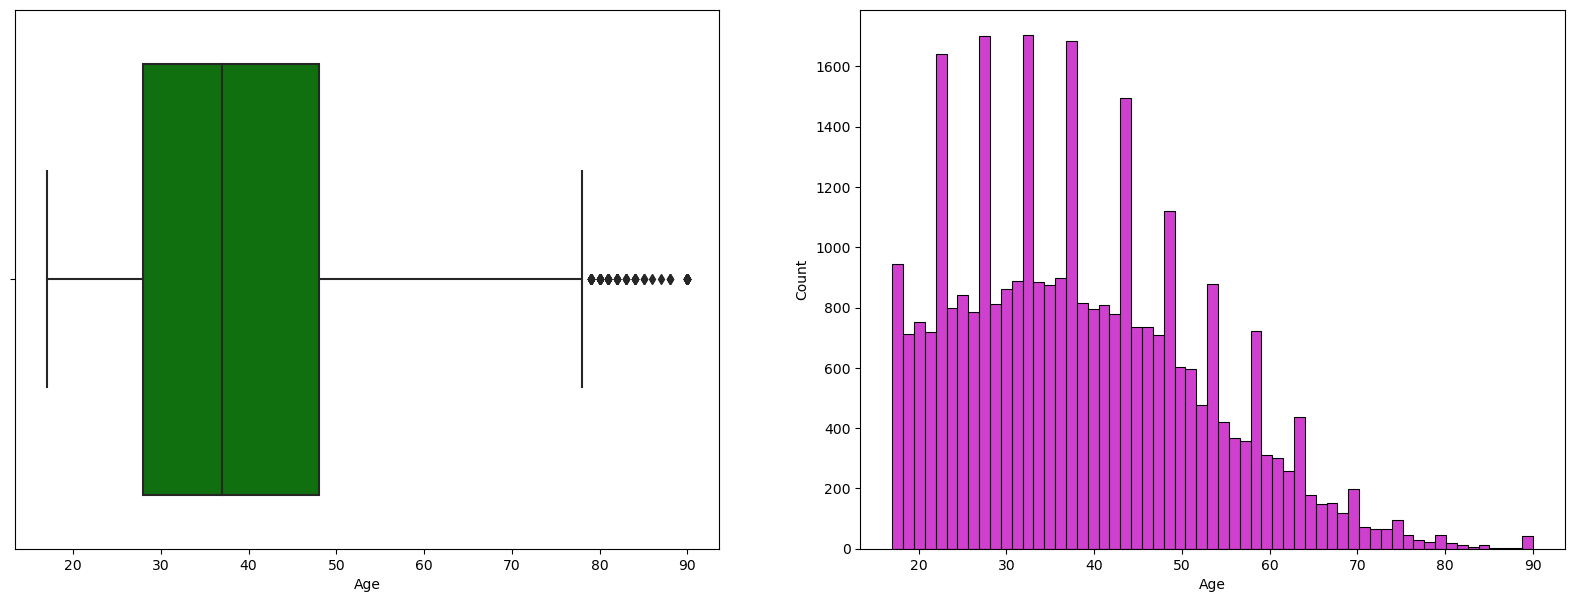

In [75]:
# Distribution of Customer_Age
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = data["Age"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = data["Age"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()


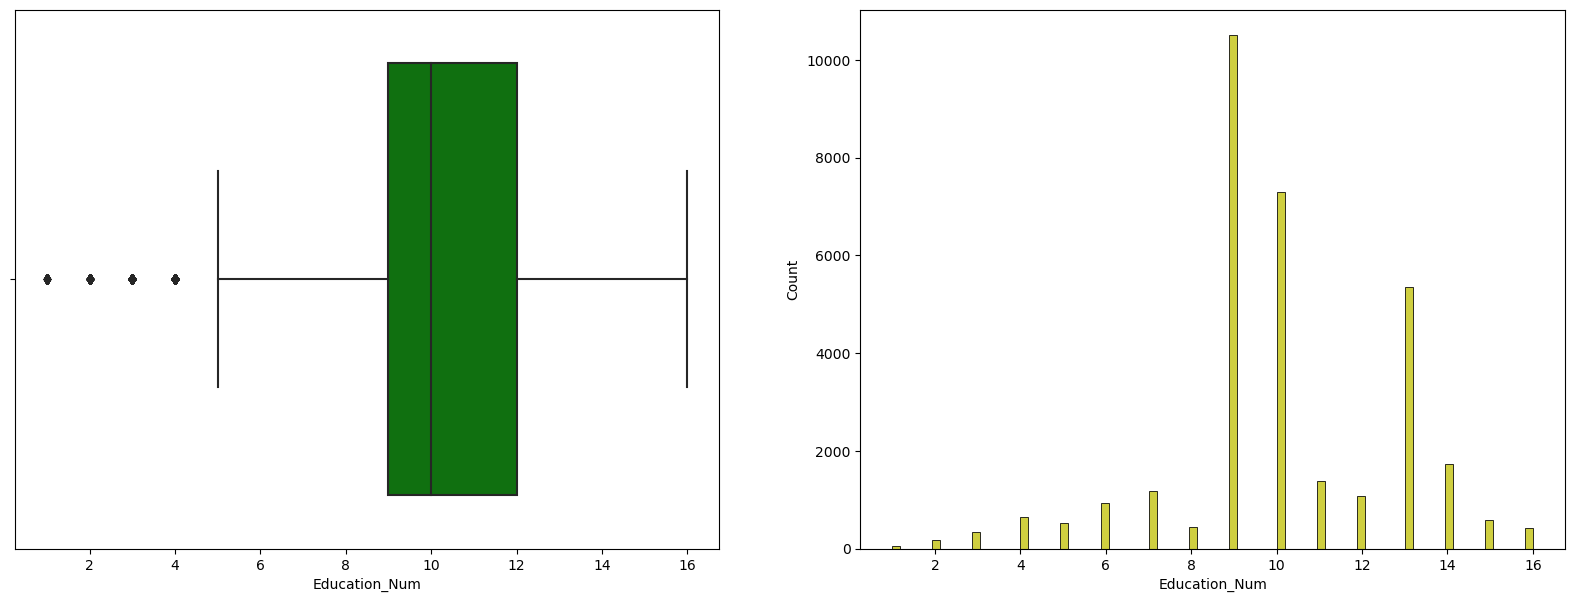

In [76]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7)) 
sns.histplot(x = data["Education_Num"], ax =ax[1], color = "y")
sns.boxplot(x = data["Education_Num"], ax = ax[0], color = "g")
plt.show()

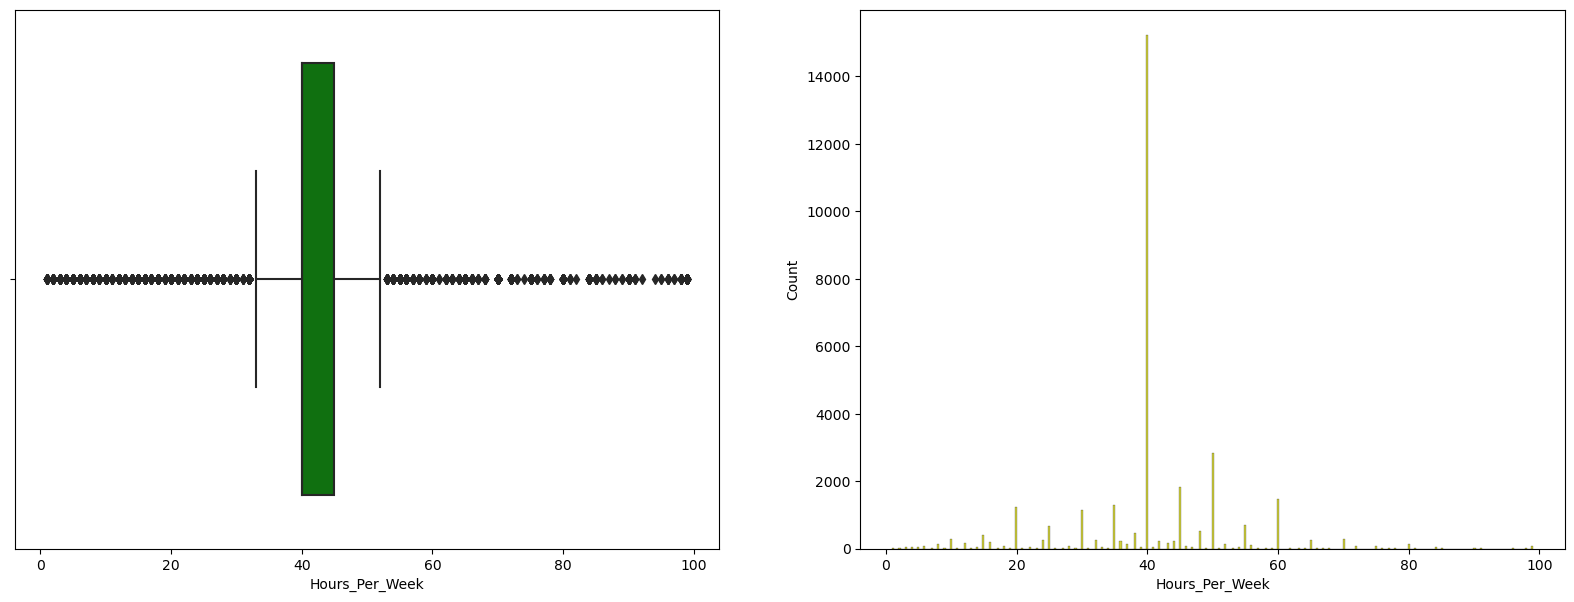

In [77]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7)) 
sns.histplot(x = data["Hours_Per_Week"], ax =ax[1], color = "y")
sns.boxplot(x = data["Hours_Per_Week"], ax = ax[0], color = "g")
plt.show()